<a href="https://colab.research.google.com/github/uol-mediaprocessing-202021/medienverarbeitung-b-color-and-tone-correction/blob/develop/ColorCorrection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medienverarbeitung Color and Tone Correction

### Slider

Our very first approach to changing the Color / Tone involved a slider which was used to adjust certain parameters of any given image. We primarily used saturation, contrast and brightness to change the input image. We used these sliders to gain valuable insights on how these parameters affect images.
Images are read and edited using the Pillow (PIL) / OpenCv (cv2) library. Images are often displayed using the matplotlib.pyplot libraray. The sliders were implemented as widgets using the ipywidgets library. First a function is created. This function defines the behaviour of the slider widget. The widget is created using the interact function from the ipywidgets library using an image and an integer (to determine the scope of the slider widget) as parameters. As the name implies one can interact with the now created slider widget. Doing this one can see the results displayed immediately. However it is advised to click on the spot where the slider should be set to instead of actually dragging the slider there. If the slider is dragged every possible image inbetween the current image and the target will be calculated and displayed. This results in a slow "animation".

In [ ]:
import PIL
from PIL import ImageEnhance
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import matplotlib.pyplot as plt

We chose a basic landscape picture featuring a meadow, a few bushes and some trees from a nearby forest. 

In [ ]:
imagefile='Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_visualized/190.png'

In [ ]:
img = PIL.Image.open(imagefile)

After opening the image we reduce it for speeding up the calcuations. This results in roughly 750x550 preview images.

In [ ]:
reduced_img = img.reduce(5)

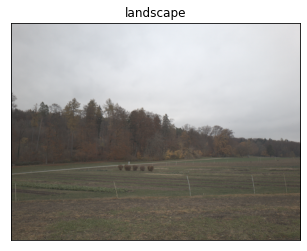

In [ ]:
plt.figure()
plt.title("landscape"), plt.xticks([]), plt.yticks([])
plt.imshow(reduced_img)
plt.show()

The function for the first slider is defined here. It changes the brightness of the input image using the Pillow library and afterwards displays the image.

In [ ]:
def f(x):
    preview_img = reduced_img
    converter = PIL.ImageEnhance.Brightness(reduced_img)
    img2 = converter.enhance(x/100)
    plt.imshow(img2)

The first slider (brightness):

In [ ]:
interact(f, x=100);

interactive(children=(IntSlider(value=100, description='x', max=300, min=-100), Output()), _dom_classes=('widg…

The function for the second slider (color /saturation) is defined here. It changes the saturation of the input image using the Pillow library and afterwards displays the image.

In [ ]:
def g(x):
    preview_img = reduced_img
    converter = PIL.ImageEnhance.Color(reduced_img)
    img3 = converter.enhance(x/100)
    plt.imshow(img3)

The second slider (using an increased saturation of 200 as a starting value):

In [ ]:
interact(g, x=200);

interactive(children=(IntSlider(value=200, description='x', max=600, min=-200), Output()), _dom_classes=('widg…

The original image for reference:

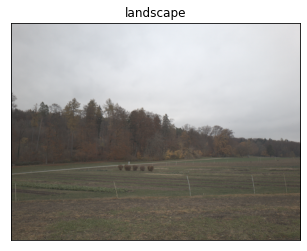

In [ ]:
plt.figure()
plt.title("landscape"), plt.xticks([]), plt.yticks([])
plt.imshow(reduced_img)
plt.show()

### Experimental editing using numpy 

We also tried editing the image using the OpenCv library and numpy. To achieve this we converted the image data to int16 using numpy and afterwards used a formula to calculate new values for every pixel by multiplying all of the values with a calculated factor aswell as some substraction / addition. In the end the values have to be clipped to fit into 0-255 (rgb values) using numpy, so they can be converted to uint8 using numpy again.

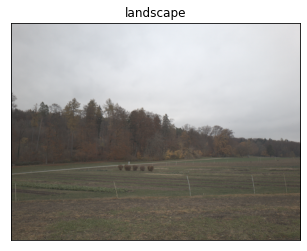

In [ ]:
plt.figure()
plt.title("landscape"), plt.xticks([]), plt.yticks([])
plt.imshow(reduced_img)
plt.show()

In [ ]:
brightness = -10
contrast = 35
img = np.int16(reduced_img)
img = img * (contrast/127+1) - contrast + brightness
img = np.clip(img, 0, 255)
img = np.uint8(img)

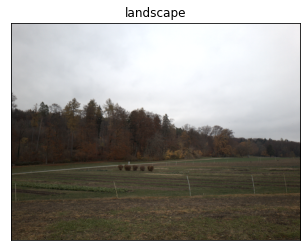

In [ ]:
plt.figure()
plt.title("landscape"), plt.xticks([]), plt.yticks([])
plt.imshow(img)
plt.show()